In [37]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [64]:
import healpy as hp
from matplotlib.collections import PolyCollection
nside=32
npix = hp.nside2npix(32)
#boundaries = hp.boundaries(nside,arange(npix))

def plot_hpix(hmap,counts,plttitle,cax,ax,cmapname,hidezalabels=False,thefontsize=14):
    boundaries = hp.boundaries(nside,arange(npix),nest=False)

    g = counts>0
    verts = swapaxes(boundaries[g,0:2,:],1,2)[:,:,::-1]
    coll = PolyCollection(verts, array=hmap[g], cmap=plt.get_cmap(cmapname), edgecolors='none',clim=cax,rasterized=True)
    ax.add_collection(coll)
    #ax.autoscale_view()
    fig.colorbar(coll, ax=ax)
    ax.set_title(plttitle)
    ax.set_axis_bgcolor('white')

    for radius_deg in [20,40,60,80]:
        r=sin(radius_deg*pi/180.)
        x = linspace(-r,r,100)
        zacontourcolor=array([1.,1.,1.])*.75
        ax.plot(x,sqrt(r**2-x**2),'--',linewidth=2,color=zacontourcolor)
        ax.plot(x,-sqrt(r**2-x**2),'--',linewidth=2,color=zacontourcolor)
        if hidezalabels!=True:
            ax.text(-.07,-r-.05, str(radius_deg)+r'$^O$', fontsize=thefontsize,backgroundcolor='white')

    ax.set_frame_on(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
def plot_slice():
    return

In [67]:
d = '/Users/abrahamn/Documents/MIT/21cm/hera/2015/jul13/unpolarized_beam_analysis_hera/'
null1 = genfromtxt(d+'null1_north_over_south_ratio_ew_ns.csv',delimiter=',')
null4 = genfromtxt(d+'null4_north_over_south_ratio_ew_ns.csv',delimiter=',')

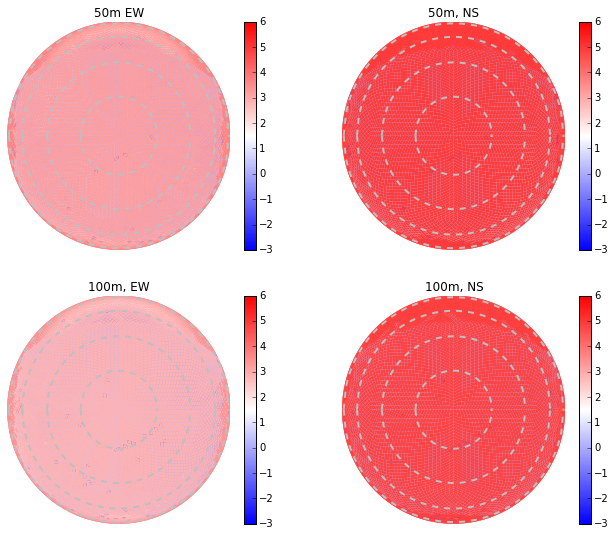

In [66]:
fig, gridax = plt.subplots(2,2)
fig.set_size_inches((11,9))

cax=[-3,6]
cm = 'bwr'
plot_hpix(null1[:,0],null1[:,2],'50m EW',cax,gridax[0,0],cm,hidezalabels=True)
plot_hpix(null1[:,1],,'50m, NS',cax,gridax[0,1],cm,hidezalabels=True)
plot_hpix(null4[:,0],,'100m, EW',cax,gridax[1,0],cm,hidezalabels=True)
plot_hpix(null4[:,1],,'100m, NS',cax,gridax[1,1],cm,hidezalabels=True)